### Simple and multiple linear regression

In this notebook a simple linear regression is performed. After, a multiple regression with ElasticNet is performed. We can observed an increase in performance by including more variables instead of only 1 to predict our target value. 

- Target: pts (points a player in the NBA acheived in a season)
- Performance metrics: R^2 and MSE

In [144]:
import numpy as np
import pandas as pd

from sklearn import model_selection, preprocessing

from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate, train_test_split
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [145]:
nba = pd.read_csv('nba_2013.csv')

display(nba.head())

display(nba.info())

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

None

In [146]:
# we redefine index with playe and team id
nba.index=nba['player'] + ' - '+ nba['bref_team_id']
nba.head()

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
Quincy Acy - TOT,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
Steven Adams - OKC,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
Jeff Adrien - TOT,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
Arron Afflalo - ORL,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
Alexis Ajinca - NOP,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013


In [147]:
#drop missing values
nba=nba.dropna()

In [148]:
#modalites pos
display(nba['pos'].value_counts())
pl_pos=nba['pos']
pl_pos

pos
SG    102
SF     92
PG     81
PF     74
C      53
G       1
Name: count, dtype: int64

Quincy Acy - TOT           SF
Arron Afflalo - ORL        SG
Alexis Ajinca - NOP         C
LaMarcus Aldridge - POR    PF
Lavoy Allen - TOT          PF
                           ..
Tony Wroten - PHI          SG
Nick Young - LAL           SG
Thaddeus Young - PHI       PF
Cody Zeller - CHA           C
Tyler Zeller - CLE          C
Name: pos, Length: 403, dtype: object

In [149]:
# encode categorical variables with dummies
nba=nba.join(pd.get_dummies(pl_pos, prefix='pos'))

In [150]:
#drop variables season, player, bref_team_id, and pos
nba=nba.drop(['season', 'player', 'bref_team_id', 'pos'], axis=1)
nba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403 entries, Quincy Acy - TOT to Tyler Zeller - CLE
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         403 non-null    int64  
 1   g           403 non-null    int64  
 2   gs          403 non-null    int64  
 3   mp          403 non-null    int64  
 4   fg          403 non-null    int64  
 5   fga         403 non-null    int64  
 6   fg.         403 non-null    float64
 7   x3p         403 non-null    int64  
 8   x3pa        403 non-null    int64  
 9   x3p.        403 non-null    float64
 10  x2p         403 non-null    int64  
 11  x2pa        403 non-null    int64  
 12  x2p.        403 non-null    float64
 13  efg.        403 non-null    float64
 14  ft          403 non-null    int64  
 15  fta         403 non-null    int64  
 16  ft.         403 non-null    float64
 17  orb         403 non-null    int64  
 18  drb         403 non-null    int64  
 19  trb 

In [151]:
nba.columns

Index(['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.',
       'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb',
       'ast', 'stl', 'blk', 'tov', 'pf', 'pts', 'season_end', 'pos_C', 'pos_G',
       'pos_PF', 'pos_PG', 'pos_SF', 'pos_SG'],
      dtype='object')

In [152]:
#drop fg, fga, ft, fta, x3p, x3pa, x3p., x2p, x2pa, x2p., ft, fta,  season_end
nba=nba.drop(['fg', 'fga', 'ft', 'fta', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'ft', 'fta', 'season_end'], axis=1)

In [153]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
Index: 403 entries, Quincy Acy - TOT to Tyler Zeller - CLE
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     403 non-null    int64  
 1   g       403 non-null    int64  
 2   gs      403 non-null    int64  
 3   mp      403 non-null    int64  
 4   fg.     403 non-null    float64
 5   efg.    403 non-null    float64
 6   ft.     403 non-null    float64
 7   orb     403 non-null    int64  
 8   drb     403 non-null    int64  
 9   trb     403 non-null    int64  
 10  ast     403 non-null    int64  
 11  stl     403 non-null    int64  
 12  blk     403 non-null    int64  
 13  tov     403 non-null    int64  
 14  pf      403 non-null    int64  
 15  pts     403 non-null    int64  
 16  pos_C   403 non-null    bool   
 17  pos_G   403 non-null    bool   
 18  pos_PF  403 non-null    bool   
 19  pos_PG  403 non-null    bool   
 20  pos_SF  403 non-null    bool   
 21  pos_SG  403 no

In [154]:
# define target variable
y= nba['pts']
X= nba.drop(['pts'], axis=1)

In [155]:
#train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [156]:
#standardize all variables to have them on same scale, dataframe
scaler = preprocessing.StandardScaler()
X_train[X_train.columns] = pd.DataFrame(scaler.fit_transform(X_train[X_train.columns]), index=X_train.index)
X_test[X_test.columns] = pd.DataFrame(scaler.transform(X_test[X_test.columns]), index=X_test.index)

In [157]:
X_train

,age,g,gs,mp,fg.,efg.,ft.,orb,drb,trb,...,stl,blk,tov,pf,pos_C,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
Victor Oladipo - ORL,-1.246508,0.968794,0.470682,1.255178,-0.196462,-0.363622,0.273794,-0.232683,0.738590,0.459087,...,2.418197,0.395615,2.815362,1.323354,-0.376622,-0.055815,-0.468718,2.027588,-0.546248,-0.603661
James Johnson - MEM,-0.073581,-0.260572,-0.844940,-0.490643,0.446576,0.239175,0.756623,0.031791,-0.491014,-0.344128,...,-0.075577,1.043735,-0.232285,-0.206649,-0.376622,-0.055815,-0.468718,-0.493197,1.830670,-0.603661
Marco Belinelli - SAS,0.161004,0.968794,-0.154238,0.718090,0.746661,1.329951,0.779255,-0.621615,0.205761,-0.048466,...,0.153736,-0.576565,0.232882,0.190018,-0.376622,-0.055815,-0.468718,-0.493197,1.830670,-0.603661
D.J. Augustin - TOT,-0.073581,0.573641,-0.680487,0.630286,-0.253621,0.353994,1.065935,-0.668287,-0.429534,-0.521525,...,0.239728,-0.706189,0.714090,0.430852,-0.376622,-0.055815,-0.468718,2.027588,-0.546248,-0.603661
John Lucas - UTA,1.099346,-0.699632,-0.779159,-0.906858,-1.525407,-1.310874,-0.895558,-0.714959,-1.030674,-0.969945,...,-0.878171,-0.803407,-0.938056,-1.070817,-0.376622,-0.055815,-0.468718,2.027588,-0.546248,-0.603661
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nick Calathes - MEM,-0.542752,0.573641,-0.746269,-0.243195,0.346548,0.052595,-1.001177,-0.543829,-0.436365,-0.487031,...,0.612361,-0.544159,0.329124,0.005851,-0.376622,-0.055815,-0.468718,-0.493197,-0.546248,1.656558
Dennis Schröder - ATL,-1.481094,-0.392290,-0.976503,-0.849842,-0.710892,-1.052532,-0.525892,-0.823860,-0.839402,-0.866464,...,-0.792179,-0.803407,-0.312486,-0.886650,-0.376622,-0.055815,-0.468718,2.027588,-0.546248,-0.603661
Chris Singleton - WAS,-0.542752,-1.446033,-0.976503,-1.295705,-0.853789,-0.837248,-0.178859,-0.621615,-0.962363,-0.891102,...,-1.021491,-0.706189,-1.018257,-1.297484,-0.376622,-0.055815,-0.468718,-0.493197,1.830670,-0.603661
Ryan Anderson - NOP,-0.308167,-1.577751,-0.516035,-0.674234,0.075043,0.698449,1.571396,0.125135,-0.695949,-0.462392,...,-0.992827,-0.576565,-0.970136,-0.985817,-0.376622,-0.055815,2.133477,-0.493197,-0.546248,-0.603661


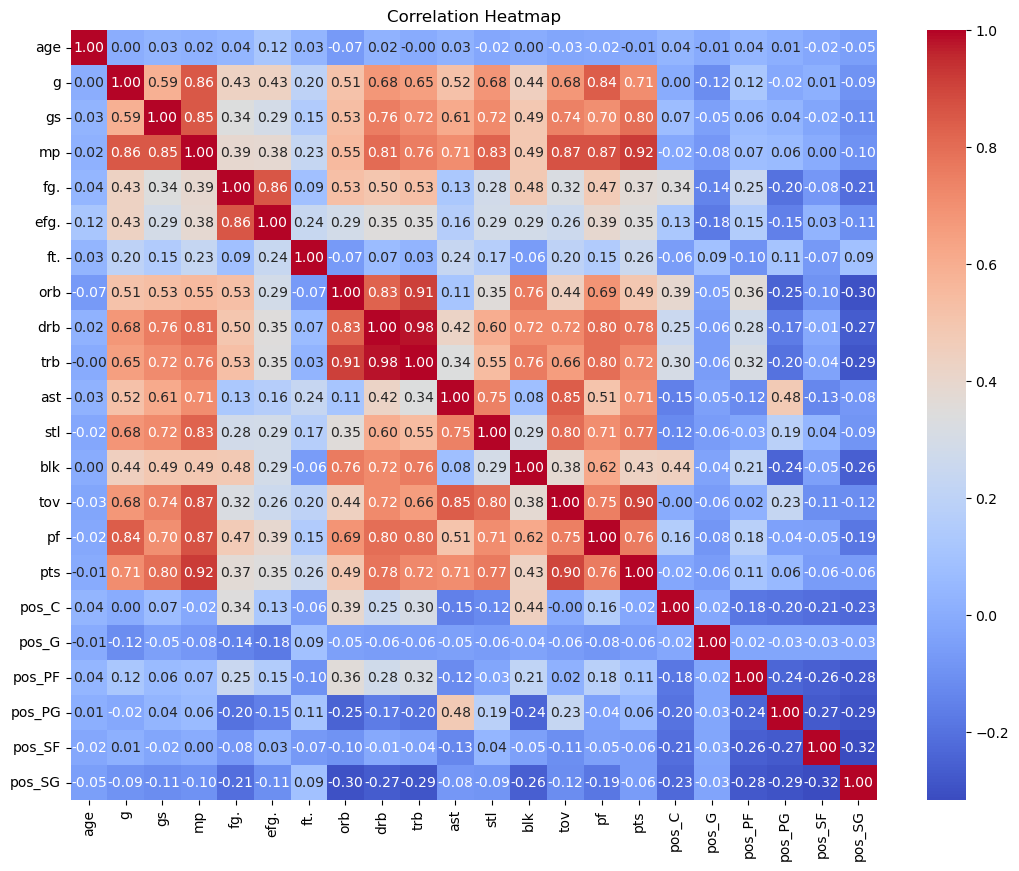

In [166]:
#heatmap of correlations to identify important variable and collinear variables
plt.figure(figsize=(13,10))
sns.heatmap(nba.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Single Linear Regression

- Most correlated with target pts
    - mp 0.92
    - tov 0.90

We will perform a SINGLE linear regression with mp, the most correlated variable to predict the target variable, number of points pts a player will score during the season

#### Performance measure --> metric
- The metrics to evaluate performance will be R^2 (coefficient of determination) and the RMSE
- R^2: indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s) in a regression model. (how well does the model fit the observed data?)
- R^2=0 the model explains none of the variability, no predictive power offered by the independent variables. 
- The closer R^2 is to 1, the better the model fits the data
- The lower the RMSE is, the better the predictions
- We will compare the performance onf both set train and test. --> How well does the model perform on seen data vs. unseen data?

In [159]:
model1=LinearRegression()
model1.fit(X_train[['mp']], y_train)

LinearRegression()

In [160]:
#scores
print('Score train: ', model1.score(X_train[['mp']], y_train))
print('Score test: ', model1.score(X_test[['mp']], y_test))
#predict

pred=model1.predict(X_train[['mp']])
pred_test=model1.predict(X_test[['mp']])
print('\n')
print('RMSE train: ', np.sqrt(mean_squared_error(y_train, pred)))
print('RMSE test: ', np.sqrt(mean_squared_error(y_test, pred_test)))

Score train:  0.8468298946623364
Score test:  0.8417540707882877


RMSE train:  181.1032364964705
RMSE test:  204.74515998457466


### Multiple Linear Regression - Elastic Net
- We have many variables and they show all high correlations. It would be a shame not to use them, they might contain very important information to create a better predictive model!
- We will use the `Elastic Net` multiple regression model. 
    --> helps reduce overfitting 
    --> eliminates need for insignificant variables
    --> created and trained on the train set by cross-validation in order to select the best parameters in terms of performance
    

In [161]:
model2 = ElasticNetCV(cv=8, l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99), 
                        alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0))

model2.fit(X_train, y_train)

ElasticNetCV(alphas=(0.001, 0.01, 0.02, 0.025, 0.05, 0.1, 0.25, 0.5, 0.8, 1.0),
             cv=8, l1_ratio=(0.1, 0.25, 0.5, 0.7, 0.75, 0.8, 0.85, 0.9, 0.99))

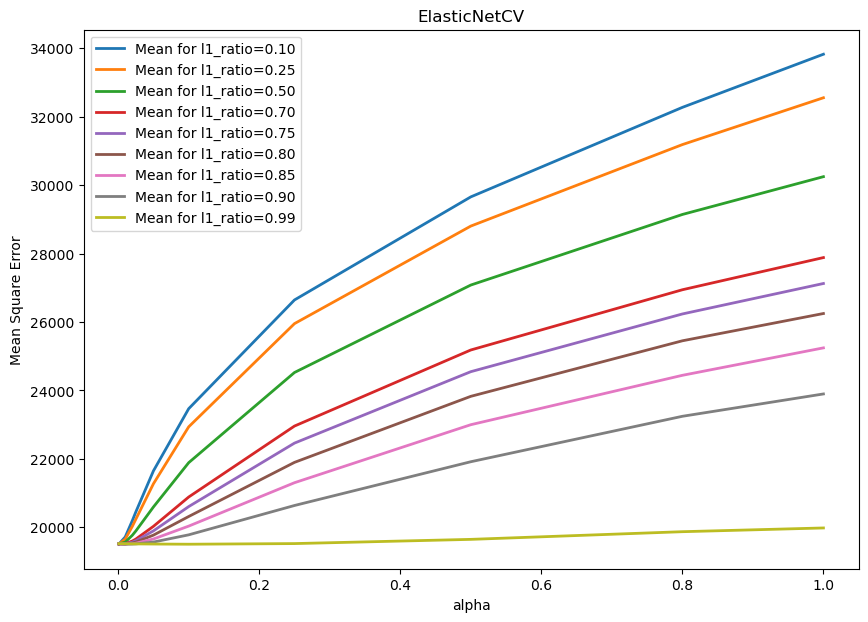

In [162]:
# plot for portrayal
alphas=model2.alphas_
plt.figure(figsize=(10, 7))

for i in range(model2.mse_path_.shape[0]):
    plt.plot(alphas, model2.mse_path_[i,:,:].mean(axis=1), 
             label='Mean for l1_ratio=%.2f' % model2.l1_ratio[i], linewidth=2)

plt.xlabel('alpha')
plt.ylabel('Mean Square Error')
plt.title('ElasticNetCV')
plt.legend()
plt.show()

In [163]:
# Increasing alpha increases MSE

#scores
print('Score train: ', model2.score(X_train, y_train))
print('Score test: ', model2.score(X_test, y_test))
#predict
pred=model2.predict(X_train)
pred_test=model2.predict(X_test)
print('\n')
print('RMSE train: ', np.sqrt(mean_squared_error(y_train, pred)))
print('RMSE test: ', np.sqrt(mean_squared_error(y_test, pred_test)))

Score train:  0.9256708541301424
Score test:  0.9302484899590973


RMSE train:  126.15915668735241
RMSE test:  135.9327733932385


- We observed improved scores in comparison to the simple linear regression. The model predicts with more accurate predictions. 
- At the same time we still observe overfitting (overlearning).

We will now compare the predicted points with the observed points to measure the model's real effectiveness

In [167]:
mean = scaler.mean_[-1]
std = scaler.scale_[-1]
print("Mean :", mean)
print("Standard deviation :", std)

pd.DataFrame({'Observed points': np.round((y_test*std)+mean), 'Predicted points' : np.round((pred_test*std)+mean)}, index = X_test.index).head(15)

Mean : 0.2670807453416149
Standard deviation : 0.4424348774784627


,Observed points,Predicted points
Jeremy Evans - UTA,178.0,131.0
Carlos Boozer - CHI,461.0,509.0
Manu Ginobili - SAS,371.0,348.0
Jonas Jerebko - DET,120.0,123.0
Francisco Garcia - HOU,140.0,105.0
Josh Smith - DET,560.0,601.0
Hedo Turkoglu - LAC,51.0,1.0
Phil Pressey - BOS,95.0,126.0
Jeffery Taylor - CHA,92.0,84.0
Archie Goodwin - PHO,86.0,96.0


The predictions are correct given the variability of the target variable and the difficulty of predictiong this type of variable. 

#### Improve performance
- more advance models
- fine-tune features 
    - review outliers
    - different scaling methods (min/max, robust scaler)
    - multicollinearity among variables --> remove
    - statistical test could help select only some features
...